# Training Notebook

## Imports

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('darkgrid')


# model pipeline imports
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#

# model evaluation
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


# model imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble._weight_boosting import AdaBoostClassifier
from sklearn.ensemble._bagging import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multioutput import ClassifierChain
from sklearn.tree._classes import DecisionTreeClassifier
from sklearn.ensemble._forest import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble._gb import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm._classes import LinearSVC
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.neural_network._multilayer_perceptron import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm._classes import NuSVC
from sklearn.linear_model._passive_aggressive import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model._ridge import RidgeClassifier
from sklearn.linear_model._stochastic_gradient import SGDClassifier
from sklearn.svm._classes import SVC
from sklearn.ensemble._stacking import StackingClassifier
from sklearn.ensemble._voting import VotingClassifier
import xgboost as xgb
xgb.set_config(verbosity=0)

## importing proccessed datasets

In [182]:
X = pd.read_csv(r'.\proccesed_data\x_train.csv')
Y = pd.read_csv(r'.\proccesed_data\y_train.csv').values.ravel()
x_test = pd.read_csv(r'.\proccesed_data\x_test.csv')

X.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0


## creating list of all models

In [3]:
models = [('AdaBoost', Pipeline([("scaling", StandardScaler()), ("model", AdaBoostClassifier())])),
          ('KNN', Pipeline([("scaling", StandardScaler()), ("model", KNeighborsClassifier())])),
          ('BagClass', Pipeline([("scaling", StandardScaler()), ("model", BaggingClassifier())])),
          ('Bernouli', Pipeline([("scaling", StandardScaler()), ("model", BernoulliNB())])),
          ('DecisionT', Pipeline([("scaling", StandardScaler()), ("model", DecisionTreeClassifier())])),
          ('ExtraTrees', Pipeline([("scaling", StandardScaler()), ("model", ExtraTreesClassifier())])),
          ('GaussNB', Pipeline([("scaling", StandardScaler()), ("model", GaussianNB())])),
          ('GBoostC', Pipeline([("scaling", StandardScaler()), ("model", GradientBoostingClassifier())])),
          ('LDA', Pipeline([("scaling", StandardScaler()), ("model", LinearDiscriminantAnalysis())])),
          ('LogisticR', Pipeline([("scaling", StandardScaler()), ("model", LogisticRegression())])),
          ('MLP', Pipeline([("scaling", StandardScaler()), ("model", MLPClassifier(hidden_layer_sizes=(100,8), max_iter=500))])),
          ('NuSVC', Pipeline([("scaling", StandardScaler()), ("model", NuSVC())])),
          ('PAC', Pipeline([("scaling", StandardScaler()), ("model", PassiveAggressiveClassifier())])),
          ('QDA', Pipeline([("scaling", StandardScaler()), ("model", QuadraticDiscriminantAnalysis())])),
          ('RandomF', Pipeline([("scaling", StandardScaler()), ("model", RandomForestClassifier())])),
          ('RidgeC', Pipeline([("scaling", StandardScaler()), ("model", RidgeClassifier())])),
          ('SGD', Pipeline([("scaling", StandardScaler()), ("model", SGDClassifier())])),
          ('SVC', Pipeline([("scaling", StandardScaler()), ("model", SVC())])),
          ('XGB', Pipeline([("scaling", StandardScaler()), ("model", xgb.XGBClassifier(use_label_encoder=False))]))]
         
# ('Calibrated', Pipeline([("scaling", StandardScaler()), ("model", CalibratedClassifierCV())])),   
# ('Classchain', Pipeline([("scaling", StandardScaler()), ("model", ClassifierChain(base_estimator=LogisticRegression()))])),
# ('MultiNB', Pipeline([("scaling", StandardScaler()), ("model", MultinomialNB())])),
# ('L-SVC', Pipeline([("scaling", StandardScaler()), ("model", LinearSVC())])),
# ('StackingC', Pipeline([("scaling", StandardScaler()), ("model", StackingClassifier(estimators=LogisticRegression()))])),
# ('VotingC', Pipeline([("scaling", StandardScaler()), ("model", VotingClassifier(estimators=LogisticRegression()))])),
print(models[1][1])

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', KNeighborsClassifier())])


In [4]:
# Test options and evaluation metric 
scoring = 'f1'
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [5]:
%%time

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

AdaBoost: 0.745510 (0.046583)
KNN: 0.740052 (0.044793)
BagClass: 0.762734 (0.058459)
Bernouli: 0.690997 (0.045513)
DecisionT: 0.735477 (0.031269)
ExtraTrees: 0.745521 (0.053300)
GaussNB: 0.723320 (0.061146)
GBoostC: 0.767251 (0.057901)
LDA: 0.732410 (0.038429)
LogisticR: 0.739793 (0.049976)
MLP: 0.751486 (0.035315)
NuSVC: 0.750193 (0.060141)
PAC: 0.589745 (0.135091)
QDA: 0.735204 (0.059793)
RandomF: 0.762984 (0.047391)
RidgeC: 0.732042 (0.039895)
SGD: 0.707635 (0.066212)
SVC: 0.740011 (0.063087)
XGB: 0.758627 (0.039058)
Wall time: 7.98 s


## Visual Comparison of Models

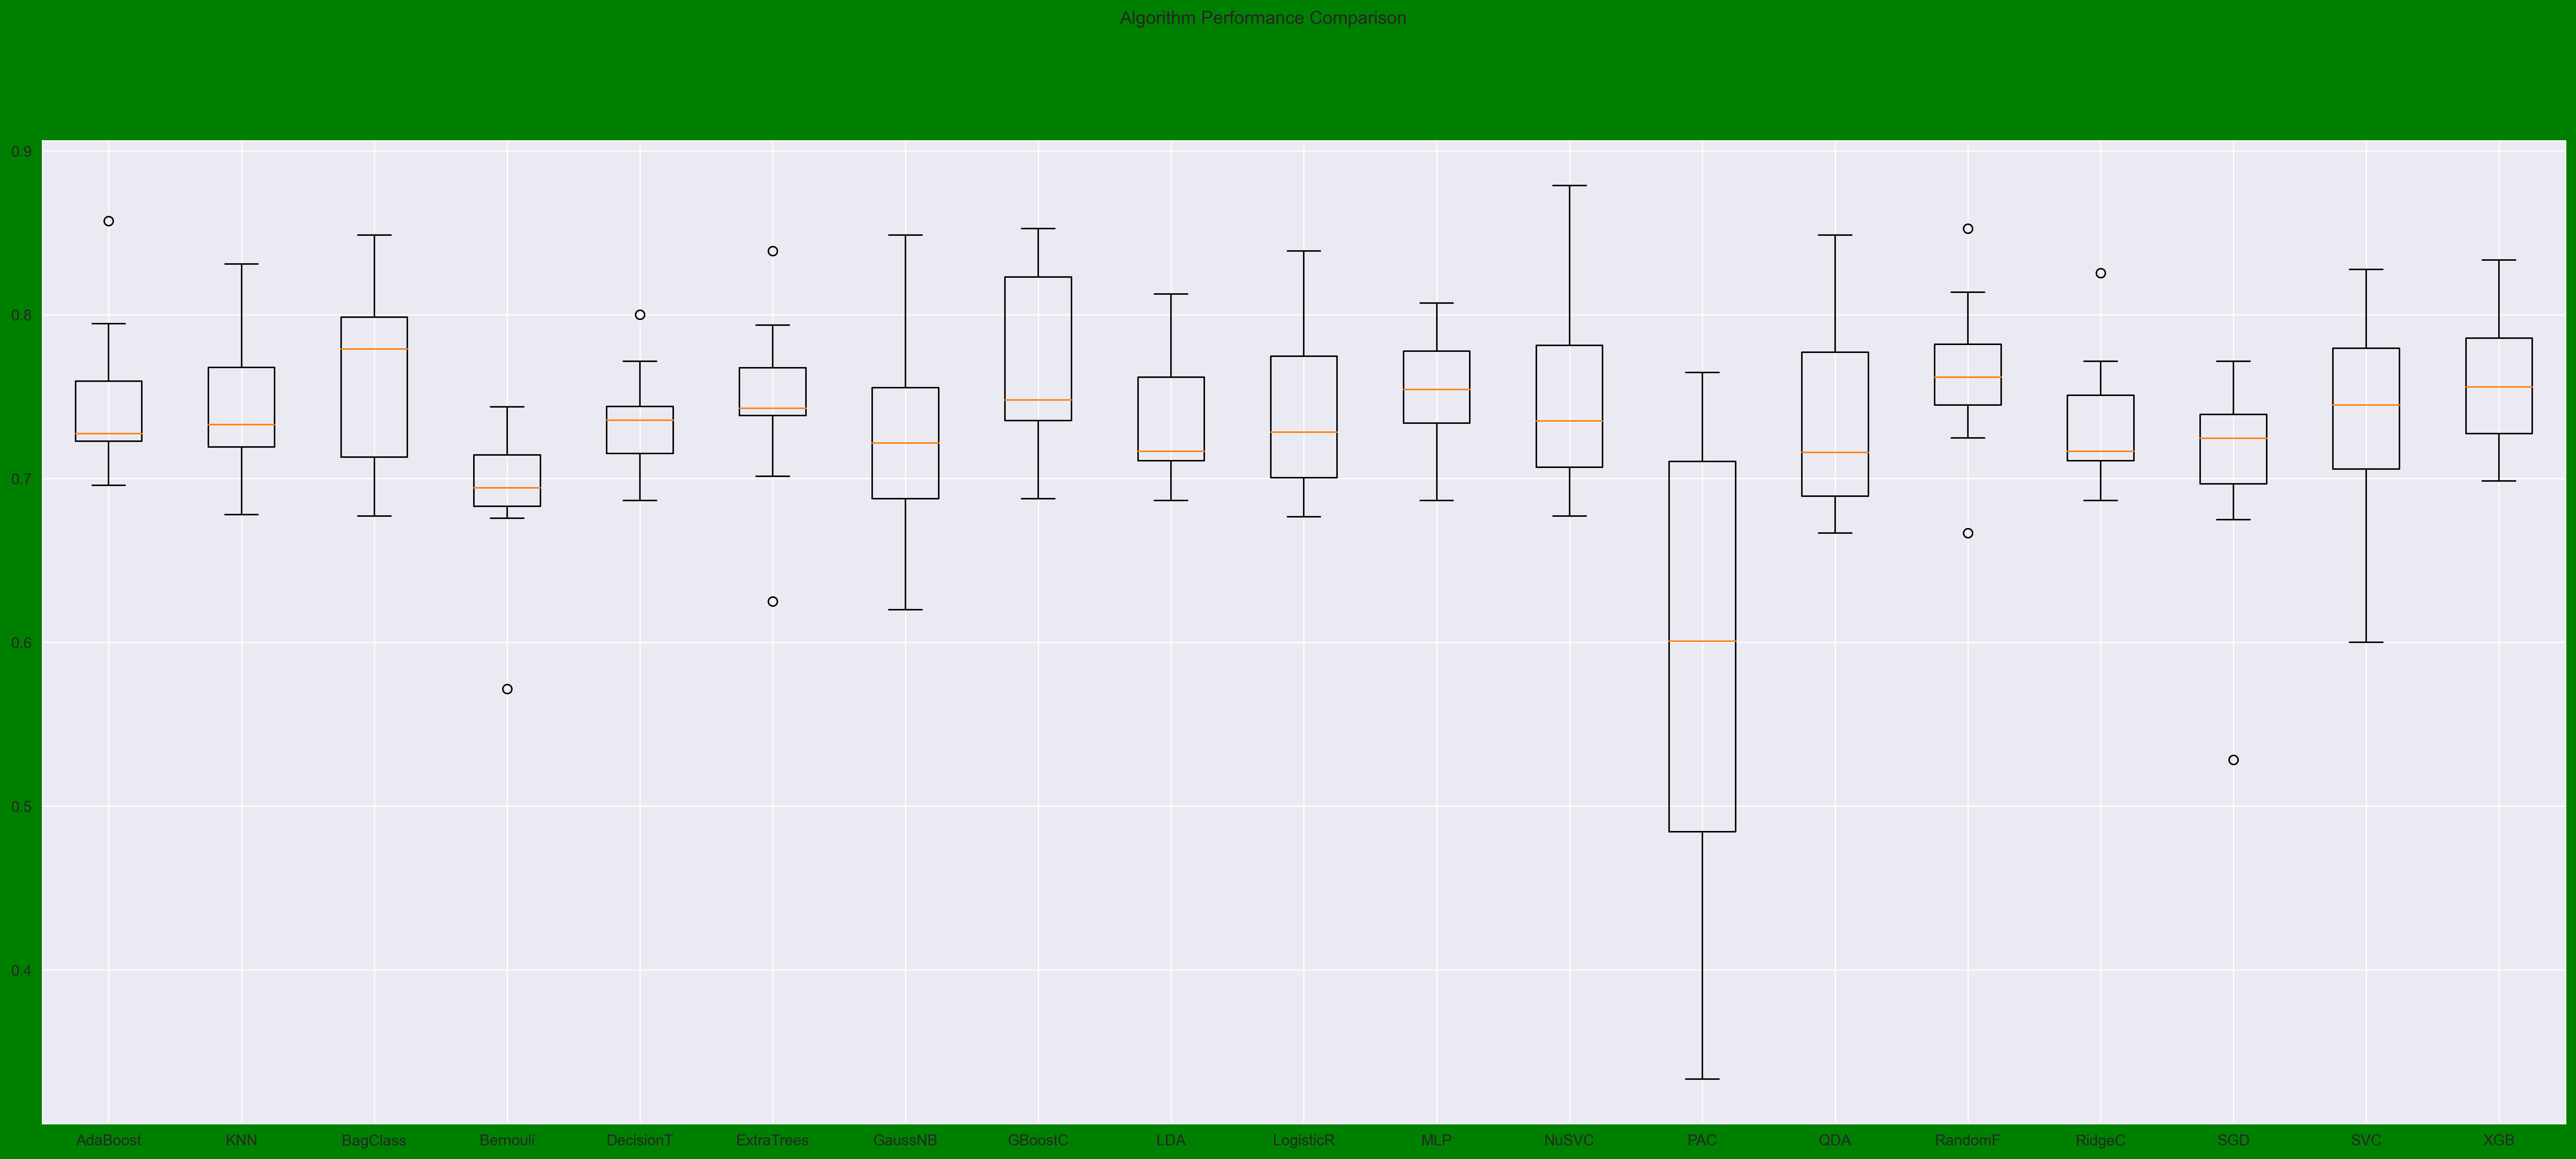

In [6]:
fig = plt.figure(figsize=(30,12), dpi= 300, facecolor='g', edgecolor='w')
fig.suptitle('Algorithm Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Creating DummyClassifier

## creating custom scoring function

In [170]:
def profit_amount(y, y_pred):
    profit = 0

    if y == 0 and y_pred == 0:         #tn
        profit += 0
    elif y == 0 and y_pred == 1:       #fp
        profit += -5000
    elif y == 1 and y_pred == 0:       #fn
        profit += 0
    elif y == 1 and y_pred == 1:       #tp
        profit += 10000
    
    return profit


profit_amount_scorer = make_scorer(profit_amount)

# Tuning top 3 Models

## KNN Tuning

In [162]:
models[1][1].get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scaling': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [190]:
%%time
scoring = 'accuracy'
# scoring = profit_amount_scorer
model_knn = GridSearchCV(estimator = models[1][1], 
                         param_grid = {'model__n_neighbors': np.arange(6,15),
                                       'model__leaf_size': np.arange(1,50,5)},
                         cv=10,
                         scoring=scoring)
model_knn.fit(X, Y)
print(f'highest scoring model: {round(model_knn.best_score_, 3)}, with params: {model_knn.best_params_}')

highest scoring model: 0.832, with params: {'model__leaf_size': 1, 'model__n_neighbors': 10}
Wall time: 6.92 s


## Cross_val_score() for KNN (same as above)

In [191]:
cv_results = cross_val_score(model_knn.best_estimator_, X, Y, cv=10, scoring=scoring)
print(round(cv_results.mean(), 3))

0.832


## cross_val_predict() for KNN

In [192]:
y_preds_knn = cross_val_predict(model_knn.best_estimator_, X, Y, cv=10)
y_pred_probs_knn = cross_val_predict(model_knn.best_estimator_, X, Y, cv=10, method='predict_proba')[:,1]
knn_manual_thresholds = np.unique(y_pred_probs_knn)
print(knn_manual_thresholds)

#printing threshold size for knn, gbc, and rf models
print(len(np.unique(y_pred_probs_knn)))
print(len(np.unique(y_pred_probs_gbc)))
print(len(np.unique(y_pred_probs_rf)))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
11
851
227


## confusion_matrix() for KNNcount

In [193]:
print(confusion_matrix(Y, y_preds_knn))
tn, fp, fn, tp = confusion_matrix(Y, y_preds_knn).ravel()

[[500  49]
 [101 241]]


## Manual Error Analysis for KNN

In [209]:
df_EA = X.copy()
df_EA['y_true'] = Y
df_EA['y_pred'] = y_preds_knn
df_EA['y_pred_probs'] = y_pred_probs_knn

# complete df
display(df_EA.head(2), df_EA.shape)
print('\n\ntrue positives df')

# true postives df
tp_df = df_EA[(df_EA['y_true'] == 1)&(df_EA['y_pred']==1)]
display(tp_df.head(2), tp_df.shape, tp_df.describe())
print('\n\n')

# false postives df
fp_df = df_EA[(df_EA['y_true'] == 0)&(df_EA['y_pred']==1)]
display(fp_df.shape, fp_df.describe())

# false negatives df
# fn = len(df[(df['y'] == 1)&(df['y_pred']==0)])
# result.append((fp,fn)) 

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,y_true,y_pred,y_pred_probs
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0,0.2
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,1.0,1.0,1.0


(891, 11)



true positives df


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,y_true,y_pred,y_pred_probs
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1.0,1.0,1.0


(241, 11)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,y_true,y_pred,y_pred_probs
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0,241.0,241.000000
mean,1.767635,27.224643,0.485477,0.572614,57.891736,0.141079,0.112033,0.593361,1.0,1.0,0.864315
std,0.787897,14.291456,0.646140,0.782569,75.381245,0.348827,0.316064,0.492229,0.0,0.0,0.135602
min,1.000000,0.420000,0.000000,0.000000,7.225000,0.000000,0.000000,0.000000,1.0,1.0,0.600000
25%,1.000000,19.000000,0.000000,0.000000,15.245800,0.000000,0.000000,0.000000,1.0,1.0,0.800000
50%,2.000000,27.000000,0.000000,0.000000,26.550000,0.000000,0.000000,1.000000,1.0,1.0,0.900000
75%,2.000000,36.000000,1.000000,1.000000,77.958300,0.000000,0.000000,1.000000,1.0,1.0,1.000000
max,3.000000,63.000000,3.000000,3.000000,512.329200,1.000000,1.000000,1.000000,1.0,1.0,1.000000


(49, 11)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,y_true,y_pred,y_pred_probs
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.0,49.0,49.000000
mean,2.387755,26.741465,0.428571,0.551020,39.814118,0.22449,0.142857,0.612245,0.0,1.0,0.728571
std,0.861596,12.369410,0.645497,0.867497,69.413314,0.42157,0.353553,0.492287,0.0,0.0,0.124164
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0,0.600000
25%,2.000000,18.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.0,1.0,0.600000
50%,3.000000,25.000000,0.000000,0.000000,14.454200,0.00000,0.000000,1.000000,0.0,1.0,0.700000
75%,3.000000,31.000000,1.000000,1.000000,24.150000,0.00000,0.000000,1.000000,0.0,1.0,0.800000
max,3.000000,64.000000,3.000000,4.000000,263.000000,1.00000,1.000000,1.000000,0.0,1.0,1.000000


## Classification Report for KNN and manual verification

In [69]:
print(classification_report(Y, y_preds_knn))

# calculating manual recall score from Cmatrix above to verify results
print(f'\nshape of Y: {Y.shape}')
print(f'total samples in Cmatrix: {tn+fp+fn+tp}\n')
print(f'accuracy score of Cmatrix: {round((tn+tp) / (tn+fp+fn+tp), 2)}')
print(f'precision score of Cmatrix: {round(tp / (tp+fp), 2)}')
print(f'recall score of Cmatrix: {round(tp / (tp+fn), 2)}')
print(f'specificity score of Cmatrix: {round(tn / (tn+fp), 2)}')

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       549
         1.0       0.83      0.70      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891


shape of Y: (891,)
total samples in Cmatrix: 891

accuracy score of Cmatrix: 0.83
precision score of Cmatrix: 0.83
recall score of Cmatrix: 0.7
specificity score of Cmatrix: 0.91


## roc_auc_score() for KNN

knn auc check: 0.87
knn thresholds: [2.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]
knn thresholds size: 12

gbc auc check: 0.89
gbc thresholds size: 852

rf auc check: 0.88
rf thresholds size: 228


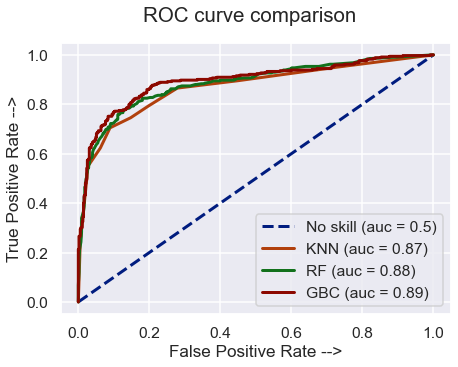

In [124]:
plt.rcParams["figure.figsize"] = (7,5)
sns.set(context='talk',
        font_scale=.95,
        font='arial',
        palette='dark',
        rc={"lines.linewidth" : 3})

#no_skill
x_no_skill = [0,1]
y_no_skill = [0,1]
auc_no_skill = auc(x_no_skill,  y_no_skill)

#knn
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y, y_pred_probs_knn)
auc_knn = round(auc(fpr_knn, tpr_knn), 2)
print(f'knn auc check: {round(roc_auc_score(Y, y_pred_probs_knn), 2)}')
print(f'knn thresholds: {thresholds_knn}')
print(f'knn thresholds size: {thresholds_knn.size}\n')

#gbc
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(Y, y_pred_probs_gbc, drop_intermediate=False)
auc_gbc = round(auc(fpr_gbc, tpr_gbc), 2)
print(f'gbc auc check: {round(roc_auc_score(Y, y_pred_probs_gbc), 2)}')
print(f'gbc thresholds size: {thresholds_gbc.size}\n')

#rf
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y, y_pred_probs_rf, drop_intermediate=False)
auc_rf = round(auc(fpr_rf, tpr_rf), 2)
print(f'rf auc check: {round(roc_auc_score(Y, y_pred_probs_rf), 2)}')
print(f'rf thresholds size: {thresholds_rf.size}')

plt.plot(x_no_skill, y_no_skill, linestyle='--', label = f'No skill (auc = {auc_no_skill})')
plt.plot(fpr_knn, tpr_knn, label = f'KNN (auc = {auc_knn})')
plt.plot(fpr_rf, tpr_rf, label = f'RF (auc = {auc_rf})')
plt.plot(fpr_gbc, tpr_gbc, label = f'GBC (auc = {auc_gbc})')

plt.suptitle("ROC curve comparison")
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

## dataframe of thresholds for KNN - sorted by highest profit

In [166]:
df = pd.DataFrame({'y': Y,
                   'y_score': y_pred_probs_knn})

result = []
for i in knn_manual_thresholds:
    df['y_pred'] = (df['y_score'] > i)
    tp = len(df[(df['y'] == 1)&(df['y_pred']==1)])
    tn = len(df[(df['y'] == 0)&(df['y_pred']==0)])
    fp = len(df[(df['y'] == 0)&(df['y_pred']==1)])
    fn = len(df[(df['y'] == 1)&(df['y_pred']==0)])
    result.append((tp,tn,fp,fn,i))

knn_t_df                    = pd.DataFrame(result)
knn_t_df.columns            = ['tp', 'tn', 'fp', 'fn', 'thr']
knn_t_df['tpr_recall']      = round(knn_t_df['tp'] / (knn_t_df['tp'] + knn_t_df['fn']), 3)
knn_t_df['fpr']             = round(knn_t_df['fp'] / (knn_t_df['fp'] + knn_t_df['tn']), 3)
knn_t_df['tpr_recall-fpr']  = knn_t_df['tpr_recall'] - knn_t_df['fpr']
knn_t_df['precision']       = knn_t_df['tp'] / (knn_t_df['tp'] + knn_t_df['fp'])
knn_t_df['specificity']     = knn_t_df['tn'] / (knn_t_df['tn'] + knn_t_df['fp'])
knn_t_df['f1score']         = 2*knn_t_df['precision']*knn_t_df['tpr_recall'] / (knn_t_df['precision'] + knn_t_df['tpr_recall'])
knn_t_df['profit']          = 10000*knn_t_df['tp'] - 5000*knn_t_df['fp'] 

display(knn_t_df.sort_values('tpr_recall', ascending=False).head(6))

,tp,tn,fp,fn,thr,tpr_recall,fpr,tpr_recall-fpr,precision,specificity,f1score,profit
0,320,209,340,22,0.000000,0.936,0.619,0.317,0.484848,0.380692,0.638799,1500000
1,298,371,178,44,0.142857,0.871,0.324,0.547,0.626050,0.675774,0.728486,2090000
2,278,449,100,64,0.285714,0.813,0.182,0.631,0.735450,0.817851,0.772283,2280000
3,252,488,61,90,0.428571,0.737,0.111,0.626,0.805112,0.888889,0.769552,2215000
4,217,514,35,125,0.571429,0.635,0.064,0.571,0.861111,0.936248,0.730969,1995000
5,178,534,15,164,0.714286,0.520,0.027,0.493,0.922280,0.972678,0.665038,1705000


## smaller df with just tpr,fpr,thr, and profit

In [100]:
# thresholds for KNN
knn_thresh_df = pd.DataFrame({'tpr': tpr_knn, 
                              'fpr': fpr_knn,
                              'thr': thresholds_knn,
                              'tpr-fpr': tpr_knn - fpr_knn}).round(3) #youdens J statistic
display(knn_thresh_df.sort_values('tpr-fpr', ascending=False).head(6))


#thresholds for GBC (with custom calculation of profit from tpr, and costs from fpr)
gbc_thresh_df = pd.DataFrame({'tpr': tpr_gbc, 
                              'fpr': fpr_gbc,
                              'thr': thresholds_gbc,
                              'tpr-fpr': tpr_gbc - fpr_gbc,
                              'profit': (1000*tpr_gbc - 50000*fpr_gbc).round(2)}).round(3)
display(gbc_thresh_df.sort_values('profit', ascending=False).head(7))

,tpr,fpr,thr,tpr-fpr
5,0.705,0.089,0.6,0.615
6,0.746,0.148,0.5,0.598
7,0.792,0.197,0.4,0.596
8,0.865,0.279,0.3,0.587
4,0.623,0.062,0.7,0.561
3,0.550,0.027,0.8,0.522


,tpr,fpr,thr,tpr-fpr,profit
4,0.213,0.000,0.974,0.213,213.45
6,0.266,0.002,0.967,0.264,175.01
3,0.164,0.000,0.979,0.164,163.74
2,0.158,0.000,0.979,0.158,157.89
5,0.213,0.002,0.973,0.212,122.38
8,0.295,0.005,0.960,0.290,22.10
1,0.003,0.000,0.996,0.003,2.92


## Changing classification Threshold and comparing new TPR and FPR scores

In [82]:
print(y_pred_probs_knn[:10])


new_threshold = .3
y_preds_knn_new_threshold = (y_pred_probs_knn >= new_threshold).astype(int)
print(y_preds_knn_new_threshold[:10])
tn, fp, fn, tp = confusion_matrix(Y, y_preds_knn_new_threshold).ravel()

print(confusion_matrix(Y, y_preds_knn_new_threshold))
print(f'with threshold of postive when greater than {new_threshold}')
print(f'tpr (recall) of knn: {tp / (tp+fn)}')
print(f'fpr of knn: {fp / (fp+tn)}')

[0.2 1.  0.3 1.  0.  0.  0.3 0.2 0.6 0.6]
[0 1 1 1 0 0 1 0 1 1]
[[396 153]
 [ 46 296]]
with threshold of postive when greater than 0.3
tpr (recall) of knn: 0.8654970760233918
fpr of knn: 0.2786885245901639
153 153 396


## precision_recall_curve() for models

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
11
846
227


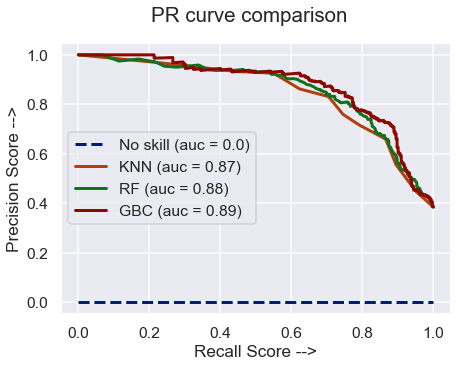

In [127]:
plt.rcParams["figure.figsize"] = (7,5)
sns.set(context='talk',
        font_scale=.95,
        font='arial',
        palette='dark',
        rc={"lines.linewidth" : 3})


# no skill
x_no_skill = [0,1]
y_no_skill = [0,0]
auc_no_skill = auc(x_no_skill,  y_no_skill)

# knn
precision_knn, recall_knn, prc_thresholds_knn = precision_recall_curve(Y, y_pred_probs_knn)
auc_score_knn = round(auc(recall_knn, precision_knn), 2)
print(prc_thresholds_knn)
print(prc_thresholds_knn.size)

# gbc
precision_gbc, recall_gbc, prc_thresholds_gbc = precision_recall_curve(Y, y_pred_probs_gbc)
auc_score_gbc = round(auc(recall_gbc, precision_gbc), 2)
print(prc_thresholds_gbc.size)

# rf
precision_rf, recall_rf, prc_thresholds_rf = precision_recall_curve(Y, y_pred_probs_rf)
auc_score_rf = round(auc(recall_rf, precision_rf), 2)
print(prc_thresholds_rf.size)

plt.plot(x_no_skill, y_no_skill, linestyle='--', label = f'No skill (auc = {auc_no_skill})')
plt.plot(recall_knn, precision_knn, label = f'KNN (auc = {auc_knn})')
plt.plot(recall_rf, precision_rf, label = f'RF (auc = {auc_rf})')
plt.plot(recall_gbc, precision_gbc, label = f'GBC (auc = {auc_gbc})')

plt.suptitle("PR curve comparison")
plt.xlabel('Recall Score -->')
plt.ylabel('Precision Score -->')
plt.legend()
plt.show()

## Comparing new Precision & Recall scores with new threshold

In [77]:
print(classification_report(Y, y_preds_knn))

print(f'\n\nWith threshold set to greater than {new_threshold}')
print(classification_report(Y, y_preds_knn_new_thresh))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       549
         1.0       0.83      0.70      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



With threshold set to greater than 0.21
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80       549
         1.0       0.66      0.87      0.75       342

    accuracy                           0.78       891
   macro avg       0.78      0.79      0.77       891
weighted avg       0.81      0.78      0.78       891



## Gradient Boosted Classifer Tuning

In [10]:
# models[8][1].get_params()

In [16]:
%%time
model_gbc = GridSearchCV(estimator = models[7][1], 
                         param_grid = {'model__max_depth': [2,3,4,5,6,7],
                                       'model__n_estimators': [110,115,120,125,130,135]},
                         cv=10,
                         scoring = scoring)

model_gbc.fit(X, Y)
print(f'highest mean cv score: {model_gbc.best_score_}, with params: {model_gbc.best_params_}')

highest mean cv score: 0.8530087390761547, with params: {'model__max_depth': 4, 'model__n_estimators': 125}
Wall time: 56.3 s


### GBC cross_val_predict(), confusion_matrix(), and classification_report()

In [17]:
y_preds_gbc = cross_val_predict(model_gbc.best_estimator_, X, Y, cv=10)
y_pred_probs_gbc = cross_val_predict(model_gbc.best_estimator_, X, Y, cv=10, method='predict_proba')[:,1]

print(confusion_matrix(Y, y_preds_gbc))
print(classification_report(Y, y_preds_gbc))
print(f' GBC auc: {round(roc_auc_score(Y, y_pred_probs_gbc), 2)}')

[[501  48]
 [ 84 258]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       549
         1.0       0.84      0.75      0.80       342

    accuracy                           0.85       891
   macro avg       0.85      0.83      0.84       891
weighted avg       0.85      0.85      0.85       891

 GBC auc: 0.89


In [20]:
# Ah hah! so the GridsearchCV object natively becomes the best model found /
# there is no need to set it equal to the "best_estimator_", 
# because this is the default behavior

## Tuning Random Forest

In [21]:
models[-4][1].get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()), ('model', RidgeClassifier())],
 'verbose': False,
 'scaling': StandardScaler(),
 'model': RidgeClassifier(),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'model__alpha': 1.0,
 'model__class_weight': None,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': None,
 'model__normalize': False,
 'model__random_state': None,
 'model__solver': 'auto',
 'model__tol': 0.001}

In [18]:
%%time
model_rf = GridSearchCV(estimator = models[-5][1], 
                        param_grid = {'model__n_estimators': np.arange(120,128,2),
                                      'model__n_jobs': [4,5,6]},
                        cv=10)

model_rf.fit(X, Y)
print(f'highest score: {model_rf.best_score_}, with params: {model_rf.best_params_}')

highest score: 0.8384394506866416, with params: {'model__n_estimators': 124, 'model__n_jobs': 6}
Wall time: 35.2 s


## cross_val_predict() on RF

In [19]:
y_preds_rf = cross_val_predict(model_rf.best_estimator_, X, Y, cv=10)
y_pred_probs_rf = cross_val_predict(model_rf.best_estimator_, X, Y, cv=10, method='predict_proba')[:,1]

In [283]:
print(np.arange(.01,.03,.01))
np.arange(1800,2300, 100)
np.arange(1,6)
np.arange(120,132,2)

[0.01 0.02]


array([120, 122, 124, 126, 128, 130])

## Tuning XGB

In [24]:
%%time

model_xgb = GridSearchCV(estimator = models[-1][1], 
                         param_grid = {'model__learning_rate': [0.01],
                                       'model__n_estimators': np.arange(1300,1900, 100),
                                       'model__min_child_weight': np.arange(4,8)},
                         cv=10)

model_xgb.fit(X, Y)
print(f'highest score: {model_xgb.best_score_}, with params: {model_xgb.best_params_}')

highest score: 0.8451685393258428, with params: {'model__learning_rate': 0.01, 'model__min_child_weight': 5, 'model__n_estimators': 1700}
Wall time: 6min 20s


## Scaling dataset with StandardScaler()

In [25]:
%%time
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Wall time: 7 ms


## Voting Classifer with top 4 models

In [26]:
%%time
model_voting = VotingClassifier(estimators = [('knn', model_knn.best_estimator_),
                                              ('gbc', model_gbc.best_estimator_),
                                              ('rf', model_rf.best_estimator_),
#                                             ('xgb', model_xgb.best_estimator_)
                                                                                 ],
                                               voting = 'soft')

cv_results_voting = pd.DataFrame(cross_val_score(model_voting, X, Y, cv=10, scoring=scoring))

# okay so I can see in the docs it says that if you call .predict() it will use the best model, but,
# does that mean it actually reruns the CV function everytime .predict() is called, to find it?
# Okay, yep, wow, this looks correct, so it should take about twice as long for this CV to run ontop of the GridCV thats already in the function
# Okay, yep, just about twice as long, so the model.best_estimator_ method is useful, or else it will just rerun the whole gridCV
# ah....... so the predict() function, does immediately use the "best_estimator_", however, the cross_val_score() function does not,
# so this is something to keep an eye on, and when in doubt, just add model.best_estimator_ onto it since this will always work

display(cv_results_voting.mean())
display(cv_results_voting.head(2))

model_voting.fit(X, Y)

0    0.844024
dtype: float64

,0
0,0.818386
1,0.869663


Wall time: 3.14 s


VotingClassifier(estimators=[('knn',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('model',
                                               KNeighborsClassifier(leaf_size=1,
                                                                    n_neighbors=10))])),
                             ('gbc',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('model',
                                               GradientBoostingClassifier(max_depth=4))])),
                             ('rf',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('model',
                                               RandomForestClassifier(n_jobs=5))]))],
                 voting='soft')

untuned is around .837-.847

scaled + tuned is around .848-.851



## Model.predict() on GBC Model

In [28]:
%%time
df_preds = pd.DataFrame(model_gbc.best_estimator_.predict(test_mvp_c))
df_preds = df_preds.astype(int)
display(df_preds.tail(2))


df_preds.insert(0, 'PassengerId', df_test['PassengerId'])
df_preds.rename(columns = {0: 'Survived'}, inplace=True)
display(df_preds.tail(5))

,0
416,0
417,0


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


Wall time: 61.7 ms


## Model.predict() on Voting Model

In [29]:
%%time
df_preds = pd.DataFrame(model_voting.predict(test_mvp_c))
df_preds = df_preds.astype(int)
display(df_preds.tail(2))


df_preds.insert(0, 'PassengerId', df_test['PassengerId'])
df_preds.rename(columns = {0: 'Survived'}, inplace=True)
display(df_preds.tail(5))

,0
416,0
417,0


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


Wall time: 111 ms


In [30]:
df_preds.to_csv(r'C:\Users\ggomp\OneDrive\Documents\GitHub\Kaggle_Competitions\titanic_classification\comp_preditions1.csv', index=False)

Notes from feature engineering:

Null accuracy                    = 61.7%

Drop NaNs with numeric columns   = 58.6% (train) base

OHC of sex column:               = 64.7% (train) +6%

IterativeImputer                 = 83.8% (train) +19%

OHC of Embarked column           = 83.1% (train) -.7%

QuantileTransformer              = 82.2% (train) -.9%

PolynomialFeatures (scaler)      = 71.2% (train) -11%

AutoPilot Accuracy               = 84.7% (train)

Highest Single model Tuning acc  = 84.9% (train) +.2%

Top 4 models Ensemble            = 85.1%         +.2%